Madusanka Madiligama 01/03/2024

In [2]:
#import libraries
import datetime
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#Configure plot aesthetics for matplotlib and seaborn.
def set_plot_aesthetics():

    plt.rcParams['figure.figsize'] = (10, 8)  
    plt.rcParams['xtick.labelsize'] = 13      
    plt.rcParams['ytick.labelsize'] = 13      
    plt.rcParams['axes.labelsize'] = 14       
    sns.set_palette('tab10')                  

# Apply the plot settings
set_plot_aesthetics()
colors = list(sns.color_palette('tab10')) 

In [5]:
#collect data

# get the bitcoin price data from an open API
coindesk_url = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

start = datetime.date(2017, 1, 1)
end = datetime.date(2022, 12, 30)

# Construct the URL with the specified date range
url = f'{coindesk_url}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

# Make the GET request
result = requests.get(url)

# Check if the request was successful
if result.status_code == 200:
    # Convert the JSON data to a pandas DataFrame
    data_json = result.json()
    bpi_data = data_json['bpi']  # Assuming 'bpi' is the key containing the relevant data
    data = pd.DataFrame(list(bpi_data.items()), columns=['date', 'price'])
    
    # Set the 'date' column as the index and convert it to datetime
    data.set_index('date', inplace=True)
    data.index = pd.to_datetime(data.index)
    
    # Display the DataFrame
    print(data)
else:
    print(f'Failed to retrieve data: {result.status_code}')

                 price
date                  
2017-01-01    964.3250
2017-01-02   1009.9738
2017-01-03   1028.3338
2017-01-04   1047.1000
2017-01-05   1140.3850
...                ...
2022-12-26  16829.2524
2022-12-27  16692.8824
2022-12-28  16502.3056
2022-12-29  16620.0660
2022-12-30  16583.8842

[2186 rows x 1 columns]


<Figure size 1400x700 with 0 Axes>

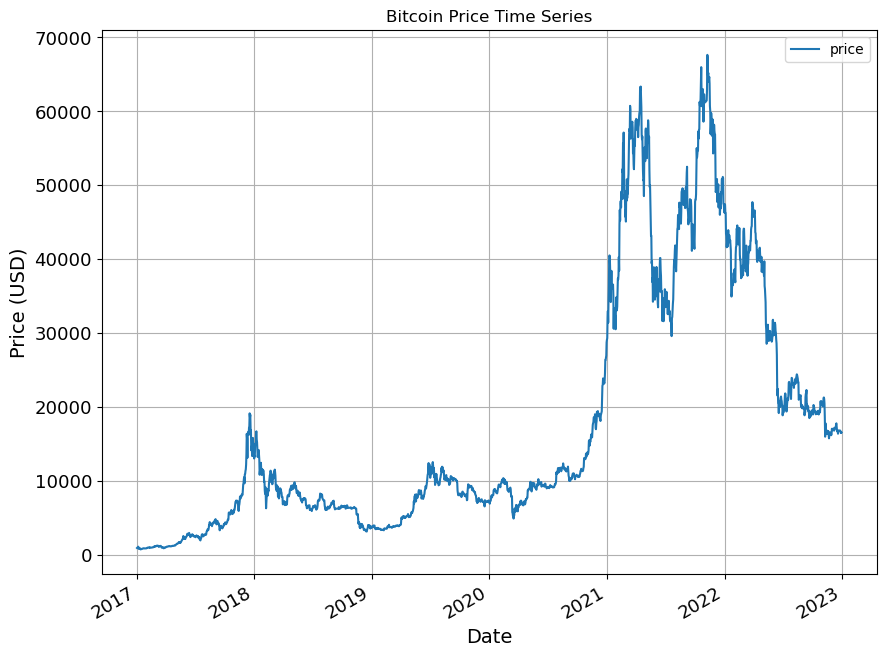

In [8]:
# Quick look at the time series
plt.figure(figsize=(14, 7))  
data.plot(title='Bitcoin Price Time Series')
plt.xlabel('Date')  
plt.ylabel('Price (USD)')  
plt.grid(True)  
plt.show()  

Given that our dataset consists of daily records, we can leverage pandas' resample method to aggregate the data over different time intervals. This technique enables us to analyze the time series at various granularities, such as weekly, monthly, or quarterly aggregates.

<Figure size 1400x700 with 0 Axes>

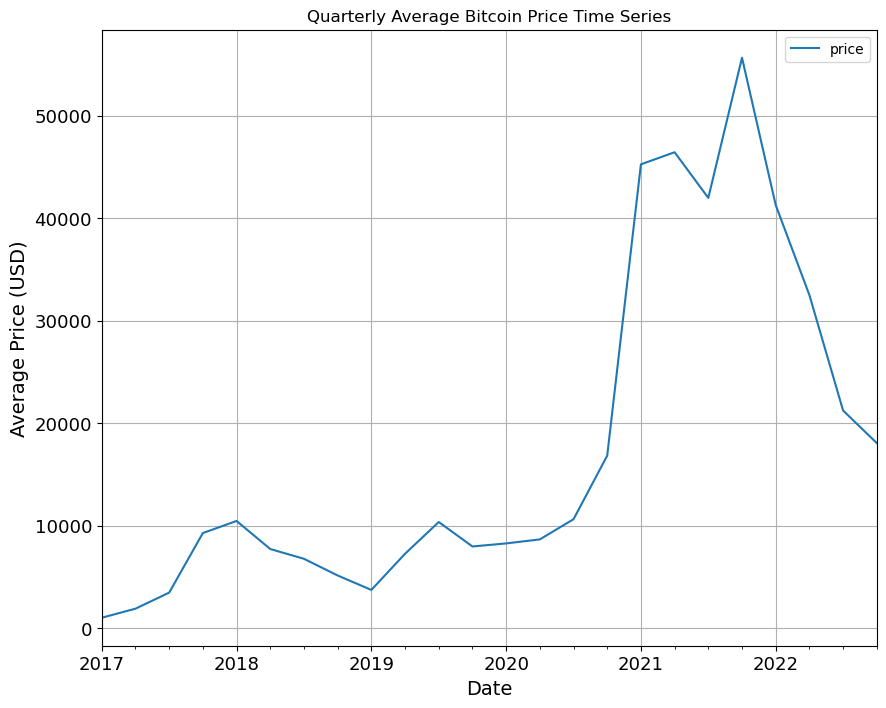

In [9]:

# Resample the data to quarterly averages and plot
plt.figure(figsize=(14, 7))
data.resample('Q').mean().plot(title='Quarterly Average Bitcoin Price')

plt.title('Quarterly Average Bitcoin Price Time Series')
plt.xlabel('Date')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.show()


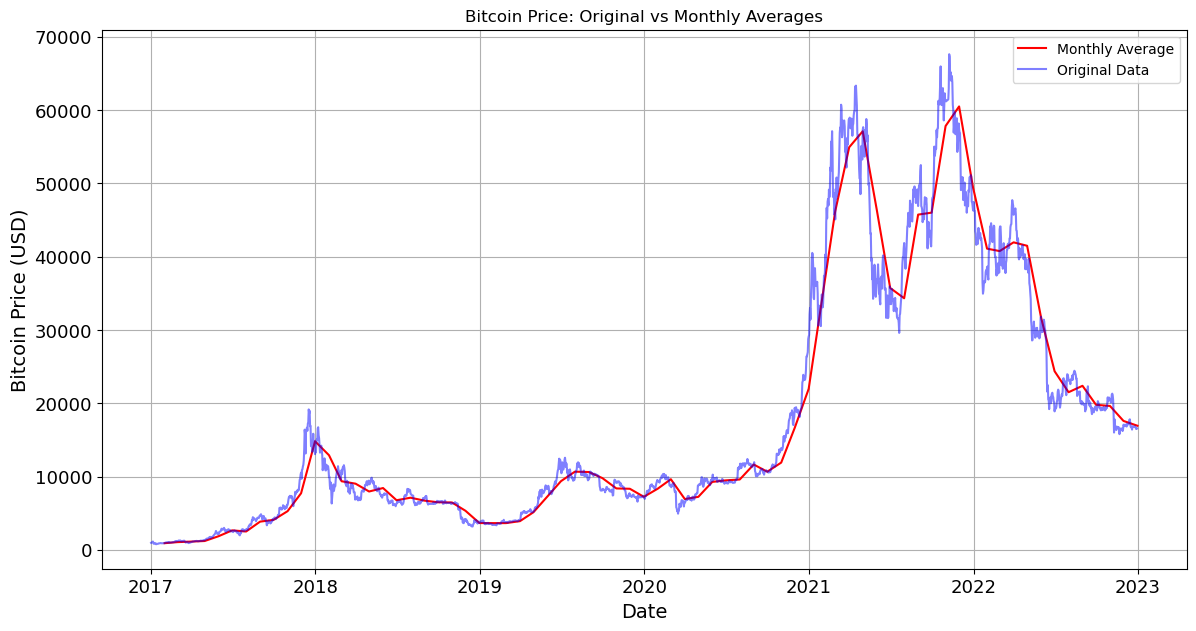

In [14]:
# Resample the data to monthly averages and plot with original data

plt.figure(figsize=(14, 7))

# Resample the data to monthly averages and plot
monthly_avg = data.resample('M').mean()
plt.plot(monthly_avg.index, monthly_avg['price'], label='Monthly Average', color='red')

# Plot the original data
plt.plot(data.index, data['price'], label='Original Data', color='blue', alpha=0.5)

# Set the plot title, and labels for x and y axes
plt.title('Bitcoin Price: Original vs Monthly Averages')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')

# Enable grid
plt.grid(True)

# Show the legend
plt.legend()

# Display the plot
plt.show()



### diff() function
The diff() function in pandas is a powerful tool used for computing the difference between consecutive elements in a DataFrame or Series. This function is particularly useful in time series analysis, as it helps in identifying changes over time. The basic usage of diff() calculates the difference between each element and its preceding element (first difference). You can also specify the number of periods to lag for the difference (second difference, third difference, etc.). This function is crucial for transforming a time series to stationarity, which is often a prerequisite for applying various statistical models and forecasting techniques.

In [15]:
data[:5]

,price
date,
2017-01-01,964.3250
2017-01-02,1009.9738
2017-01-03,1028.3338
2017-01-04,1047.1000
2017-01-05,1140.3850


In [16]:
# shows the difference `y(t+1) - y(t)`
data[:5].diff()

,price
date,
2017-01-01,NaN
2017-01-02,45.6488
2017-01-03,18.3600
2017-01-04,18.7662
2017-01-05,93.2850


In [17]:
# difference of current and two time steps back `y(t+2) - y(t)`
data[:5].diff(2)

,price
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,64.0088
2017-01-04,37.1262
2017-01-05,112.0512


<Figure size 1400x700 with 0 Axes>

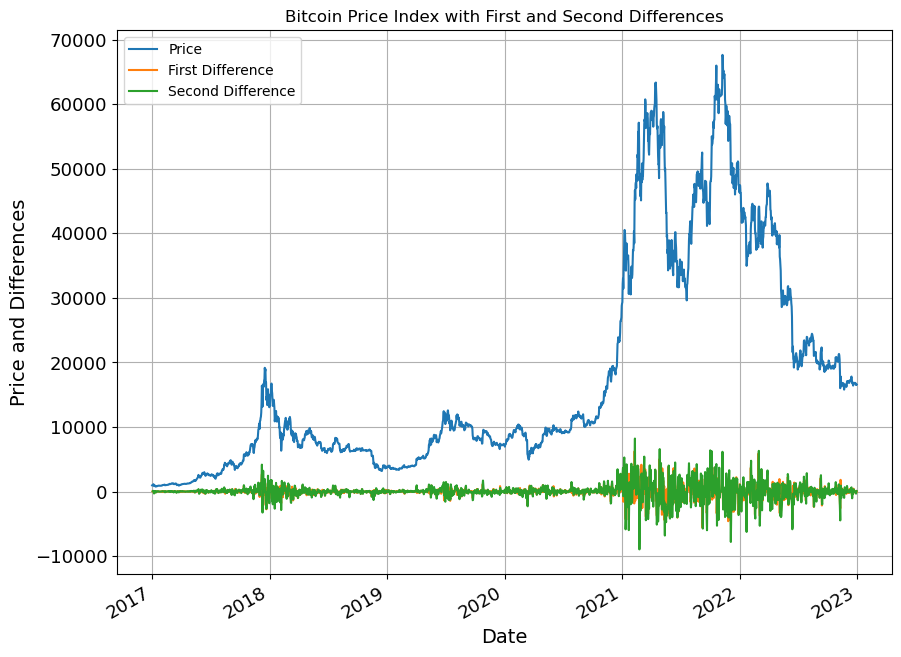

In [18]:
#Plot Bitcoin Price Index with First and Second Differences
# Concatenating the original and differenced data
price_diff = pd.concat([data['price'], 
                      data['price'].diff(), 
                      data['price'].diff(2)], 
                     axis=1)

price_diff.columns = ['Price', 'First Difference', 'Second Difference']

# Plotting
plt.figure(figsize=(14, 7))
price_diff.plot()

# Adding plot title and labels
plt.title('Bitcoin Price Index with First and Second Differences')
plt.xlabel('Date')
plt.ylabel('Price and Differences')
plt.grid(True)
plt.show()


From a straightforward examination of the plot, it's evident that the original dataset exhibits non-stationary characteristics. This is typically indicated by noticeable trends or fluctuations in variance over time. However, upon applying the diff() and diff(2) methods, which calculate the first and second differences of the data, the resulting transformed series appear to be stationary around a mean of 0. Stationarity in the differenced data is a key criterion for applying time series forecasting models such as ARIMA (Autoregressive Integrated Moving Average). These methods are particularly suited to data that, once differenced, show constant statistical properties over time, such as mean and variance.

### shift() function
The shift() function in pandas is used to shift the index of a DataFrame or Series by a specified number of periods. This function is particularly useful in time series analysis for creating lagged features or for comparing a series against its own past values.

When you use shift(), the data is moved down or up along the index. For example, shift(1) will move all elements in the DataFrame or Series one period forward, effectively creating a lag of one period. Conversely, shift(-1) moves all elements one period backward.

Here are some key points about the shift() function:

- Lagging Data: It's often used to create lagged versions of a time series, which can be useful for forecasting models where past values are predictors.

- Time Series Calculations: It can be used for time-based calculations, such as calculating the percentage change from one period to the next.

- Handling of NaNs: Shifting leads to NaN values at the start or end of the series (depending on the direction of the shift).

- No Change in Index: The index itself remains unchanged; only the data values are shifted.

In [19]:
data[:5]

,price
date,
2017-01-01,964.3250
2017-01-02,1009.9738
2017-01-03,1028.3338
2017-01-04,1047.1000
2017-01-05,1140.3850


In [20]:
# push the data forward by one index keeping the original data values unchanged.
data[:5].shift()

,price
date,
2017-01-01,NaN
2017-01-02,964.3250
2017-01-03,1009.9738
2017-01-04,1028.3338
2017-01-05,1047.1000


In [22]:
#Shift the time index forward by two periods keeping the original data values unchanged. 
data[:5].shift(2)

,price
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,964.3250
2017-01-04,1009.9738
2017-01-05,1028.3338


In [23]:
#Shifts the first five rows of the 'data' DataFrame forward by two periods, inferring the frequency from the DataFrame's time index. This operation modifies the index timestamps while keeping the data values unchanged.

data[:5].shift(periods=2, freq='infer')

,price
date,
2017-01-03,964.3250
2017-01-04,1009.9738
2017-01-05,1028.3338
2017-01-06,1047.1000
2017-01-07,1140.3850


In [24]:
# `diff()` can be implemented as follows
data[:5] - data[:5].shift()

,price
date,
2017-01-01,NaN
2017-01-02,45.6488
2017-01-03,18.3600
2017-01-04,18.7662
2017-01-05,93.2850


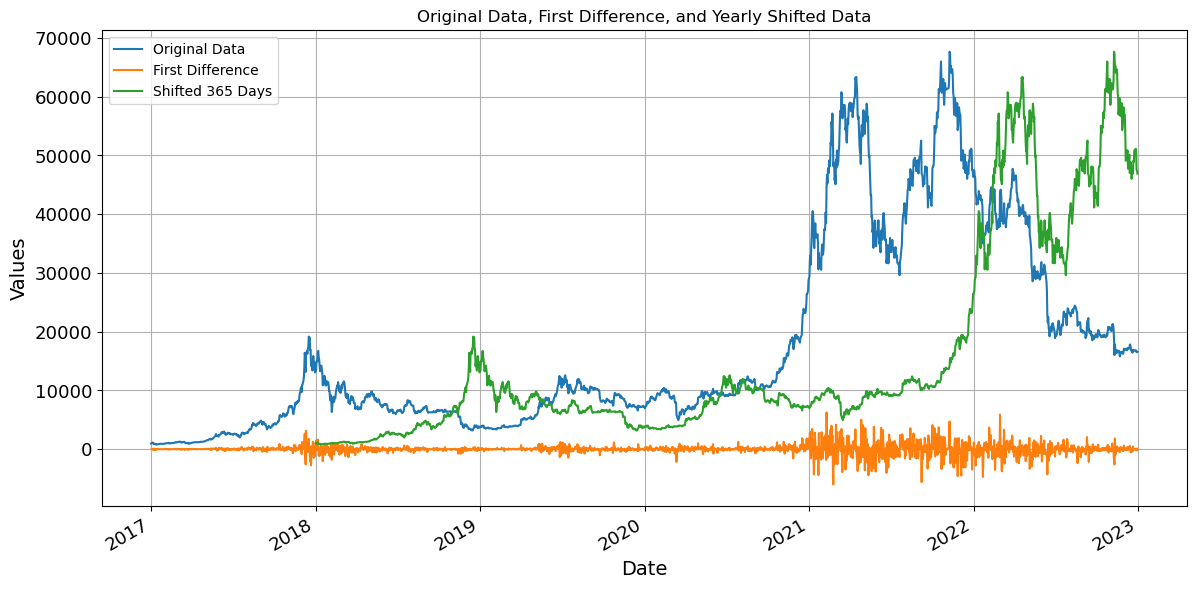

In [26]:
# Plot Original Data, First Difference, and Yearly Shifted Data
# Calculate the first difference of the data
data_diff = data - data.shift()

# Shift the data by 365 periods
data_shifted_365 = data.shift(periods=365)

# Concatenate the original data, first difference, and 365-period shifted data
concatenated_data = pd.concat([data, data_diff, data_shifted_365], axis=1)

# Rename the columns for clarity
concatenated_data.columns = ['Original Data', 'First Difference', 'Shifted 365 Days']

# Plot the concatenated data
concatenated_data.plot(figsize=(14, 7), title='Original Data, First Difference, and Yearly Shifted Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid(True)
plt.show()



### Moving Averages
 are a fundamental technique in both statistics and time series analysis, commonly used to smooth out short-term fluctuations and highlight longer-term trends or cycles in data. By averaging the data over a specific window, moving averages filter out the 'noise' and make patterns more discernible.In time series analysis, moving averages are used for smoothing data, identifying trend directions, and as a component in more complex indicators and models. They are widely used in finance for stock price analysis, economic forecasting, and various other fields where time series data is analyzed

<Figure size 1400x700 with 0 Axes>

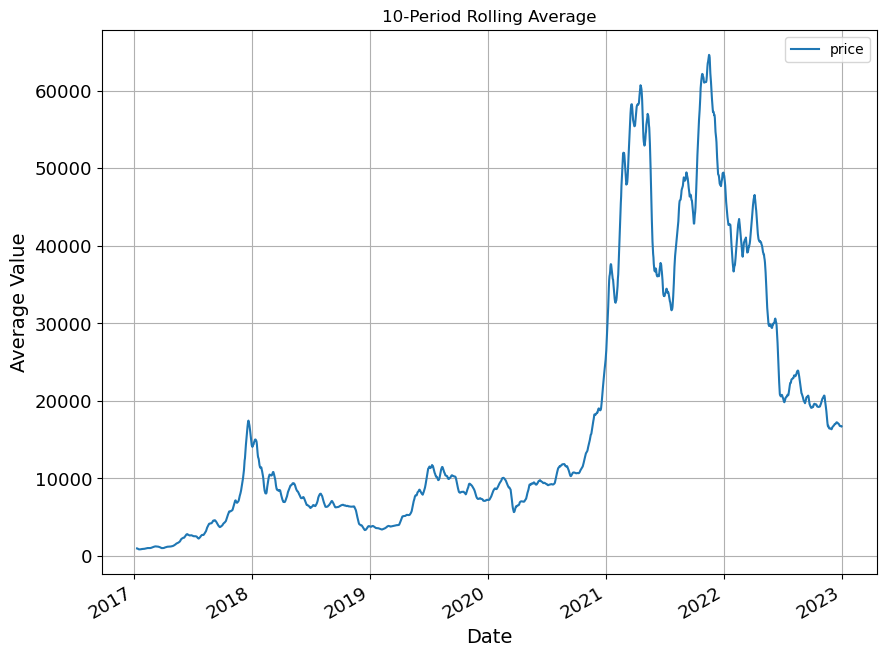

In [28]:
# Plot 10-Period Rolling Average
plt.figure(figsize=(14, 7))

# Calculate the rolling window (moving average) and plot
data.rolling(window=10).mean().plot()


plt.title('10-Period Rolling Average')
plt.xlabel('Date')
plt.ylabel('Average Value')

plt.grid(True)

# Display the plot
plt.show()

<Figure size 1400x700 with 0 Axes>

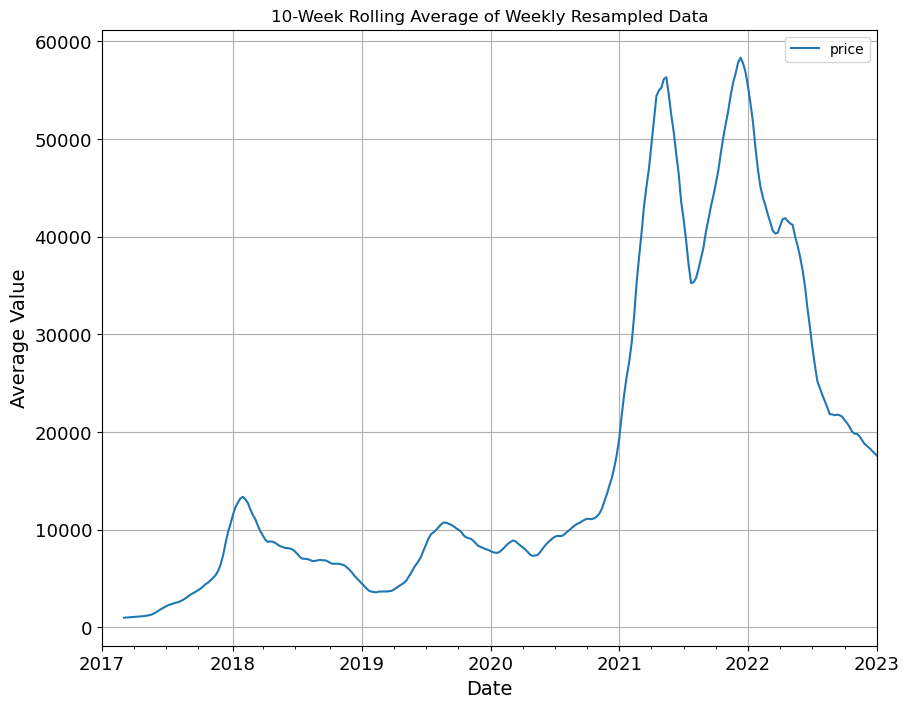

In [29]:
plt.figure(figsize=(14, 7))

# Resample the data to weekly, calculate the mean, then apply a 10-week rolling average
weekly_rolling_avg = data.resample('W').mean().rolling(window=10).mean()

# Plot the 10-week rolling average of the weekly data
weekly_rolling_avg.plot()

# Set the title and labels for clarity
plt.title('10-Week Rolling Average of Weekly Resampled Data')
plt.xlabel('Date')
plt.ylabel('Average Value')

# Enable the grid for easier data interpretation
plt.grid(True)

# Display the plot
plt.show()

<Figure size 1400x700 with 0 Axes>

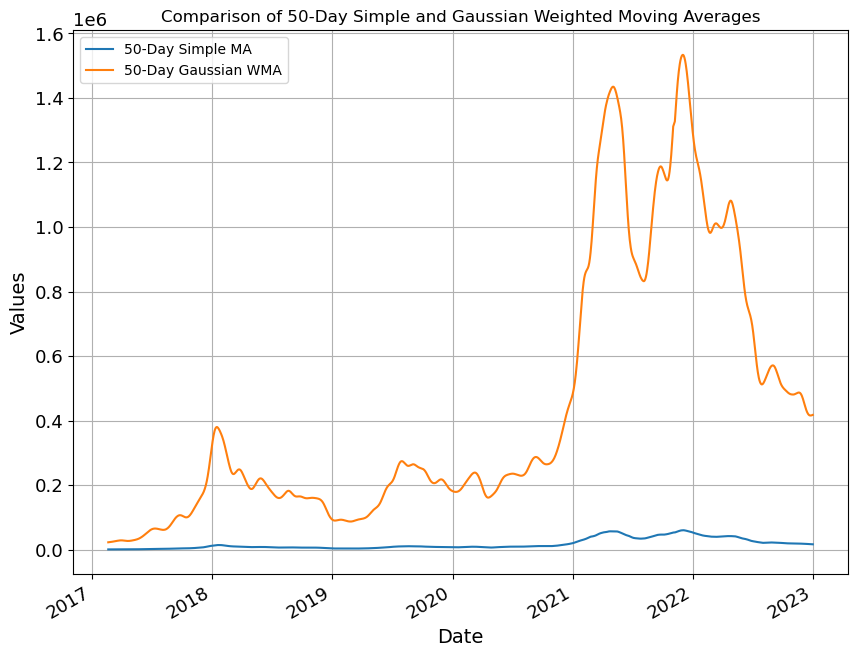

In [30]:
# Comparison of 50-Day Simple and Gaussian Weighted Moving Averages

# Calculate simple moving average (SMA)
simple_ma = data.rolling(window=50).mean()

# Calculate weighted moving average (WMA) using a Gaussian window
window_ma = data.rolling(window=50, win_type='gaussian').sum(std=10)

# Concatenate the two series for comparison
ma_combined = pd.concat([simple_ma, window_ma], axis=1)

# Rename the columns for clarity
ma_combined.columns = ['50-Day Simple MA', '50-Day Gaussian WMA']

# Plot the moving averages
plt.figure(figsize=(14, 7))  # Set figure size for better visibility
ma_combined.plot()

# Set plot title and labels
plt.title('Comparison of 50-Day Simple and Gaussian Weighted Moving Averages')
plt.xlabel('Date')
plt.ylabel('Values')


plt.grid(True)
plt.show()


<Figure size 1400x700 with 0 Axes>

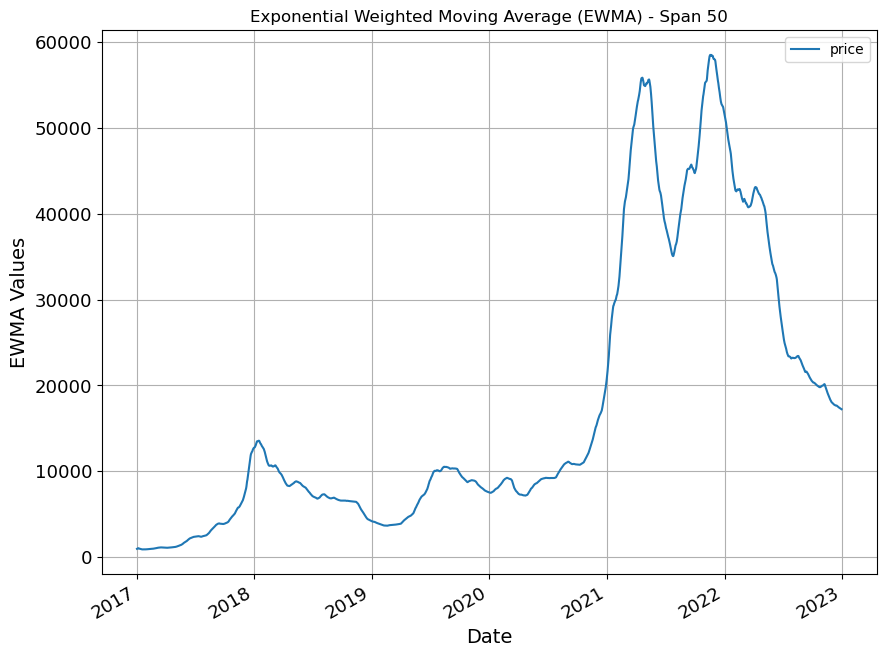

In [31]:
plt.figure(figsize=(14, 7))

# Calculate and plot the Exponential Weighted Moving Average
data.ewm(span=50).mean().plot()

# Set the title and labels for clarity
plt.title('Exponential Weighted Moving Average (EWMA) - Span 50')
plt.xlabel('Date')
plt.ylabel('EWMA Values')

# Enable the grid for easier data interpretation
plt.grid(True)

# Display the plot
plt.show()

<Figure size 1400x700 with 0 Axes>

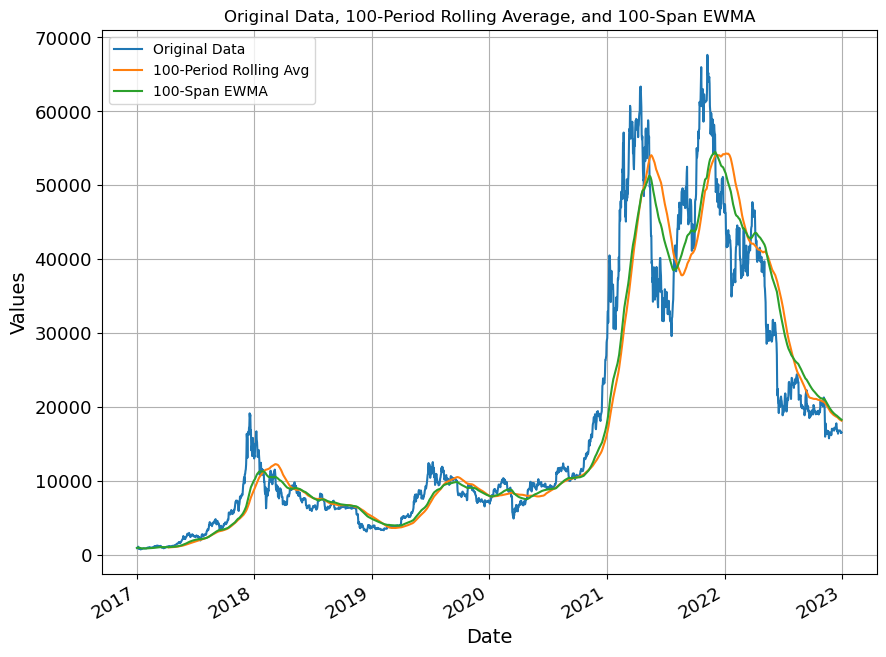

In [32]:
#Plot Original Data, 100-Period Rolling Average, and 100-Span EWMA

# Calculate the 100-period rolling average
rolling_avg = data.rolling(window=100).mean()

# Calculate the 100-span exponential weighted moving average
ewm_avg = data.ewm(span=100).mean()

# Concatenate the original data, rolling average, and EWMA
combined_data = pd.concat([data, rolling_avg, ewm_avg], axis=1)

# Rename the columns for clarity
combined_data.columns = ['Original Data', '100-Period Rolling Avg', '100-Span EWMA']

# Plot the data
plt.figure(figsize=(14, 7))  
combined_data.plot()

# Set the title and labels for clarity
plt.title('Original Data, 100-Period Rolling Average, and 100-Span EWMA')
plt.xlabel('Date')
plt.ylabel('Values')

plt.grid(True)
plt.show()
